In [ ]:
%matplotlib inline


Soft Cosine Measure
===================

Demonstrates using Gensim's implemenation of the SCM.


Soft Cosine Measure (SCM) is a promising new tool in machine learning that
allows us to submit a query and return the most relevant documents. This
tutorial introduces SCM and shows how you can compute the SCM similarities
between two documents using the ``inner_product`` method.

Soft Cosine Measure basics
--------------------------

Soft Cosine Measure (SCM) is a method that allows us to assess the similarity
between two documents in a meaningful way, even when they have no words in
common. It uses a measure of similarity between words, which can be derived
[2] using [word2vec][] [4] vector embeddings of words. It has been shown to
outperform many of the state-of-the-art methods in the semantic text
similarity task in the context of community question answering [2].


SCM is illustrated below for two very similar sentences. The sentences have
no words in common, but by modeling synonymy, SCM is able to accurately
measure the similarity between the two sentences. The method also uses the
bag-of-words vector representation of the documents (simply put, the word's
frequencies in the documents). The intution behind the method is that we
compute standard cosine similarity assuming that the document vectors are
expressed in a non-orthogonal basis, where the angle between two basis
vectors is derived from the angle between the word2vec embeddings of the
corresponding words.




In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

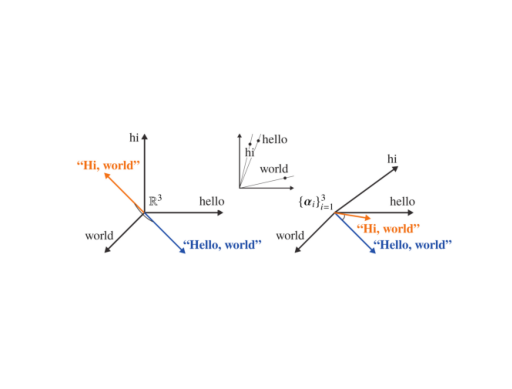

In [7]:
img = mpimg.imread('scm-hello.png')
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

This method was perhaps first introduced in the article “Soft Measure and
Soft Cosine Measure: Measure of Features in Vector Space Model” by Grigori
Sidorov, Alexander Gelbukh, Helena Gomez-Adorno, and David Pinto.

In this tutorial, we will learn how to use Gensim's SCM functionality, which
consists of the ``inner_product`` method for one-off computation, and the
``SoftCosineSimilarity`` class for corpus-based similarity queries.

.. Important::
   If you use Gensim's SCM functionality, please consider citing [1], [2] and [3].

Computing the Soft Cosine Measure
---------------------------------
To use SCM, you need some existing word embeddings.
You could train your own Word2Vec model, but that is beyond the scope of this tutorial
(check out `sphx_glr_auto_examples_tutorials_run_word2vec.py` if you're interested).
For this tutorial, we'll be using an existing Word2Vec model.

Let's take some sentences to compute the distance between.




In [8]:
# Initialize logging.
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [9]:
sentence_obama = 'Obama speaks to the media in Illinois'
sentence_president = 'The president greets the press in Chicago'
sentence_orange = 'Oranges are my favorite fruit'

The first two sentences sentences have very similar content, and as such the
SCM should be high. By contrast, the third sentence is unrelated to the first
two and the SCM should be low.

Before we compute the SCM, we want to remove stopwords ("the", "to", etc.),
as these do not contribute a lot to the information in the sentences.




In [10]:
# Import and download stopwords from NLTK.
from nltk.corpus import stopwords
from nltk import download

In [11]:
download('stopwords')  # Download stopwords list.
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rca2t1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
def preprocess(sentence):
    return [w for w in sentence.lower().split() if w not in stop_words]

In [13]:
sentence_obama = preprocess(sentence_obama)
sentence_president = preprocess(sentence_president)
sentence_orange = preprocess(sentence_orange)

Next, we will build a dictionary and a TF-IDF model, and we will convert the
sentences to the bag-of-words format.




In [14]:
from gensim.corpora import Dictionary
documents = [sentence_obama, sentence_president, sentence_orange]
dictionary = Dictionary(documents)

2023-12-15 09:30:50,469 : INFO : adding document #0 to Dictionary<0 unique tokens: []>
2023-12-15 09:30:50,470 : INFO : built Dictionary<11 unique tokens: ['illinois', 'media', 'obama', 'speaks', 'chicago']...> from 3 documents (total 11 corpus positions)
2023-12-15 09:30:50,471 : INFO : Dictionary lifecycle event {'msg': "built Dictionary<11 unique tokens: ['illinois', 'media', 'obama', 'speaks', 'chicago']...> from 3 documents (total 11 corpus positions)", 'datetime': '2023-12-15T09:30:50.471326', 'gensim': '4.3.0', 'python': '3.11.5 (main, Sep 11 2023, 08:19:27) [Clang 14.0.6 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}


In [15]:
sentence_obama = dictionary.doc2bow(sentence_obama)
sentence_president = dictionary.doc2bow(sentence_president)
sentence_orange = dictionary.doc2bow(sentence_orange)

In [16]:
from gensim.models import TfidfModel
documents = [sentence_obama, sentence_president, sentence_orange]
tfidf = TfidfModel(documents)

2023-12-15 09:30:59,725 : INFO : collecting document frequencies
2023-12-15 09:30:59,727 : INFO : PROGRESS: processing document #0
2023-12-15 09:30:59,729 : INFO : TfidfModel lifecycle event {'msg': 'calculated IDF weights for 3 documents and 11 features (11 matrix non-zeros)', 'datetime': '2023-12-15T09:30:59.728973', 'gensim': '4.3.0', 'python': '3.11.5 (main, Sep 11 2023, 08:19:27) [Clang 14.0.6 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'initialize'}


In [17]:
sentence_obama = tfidf[sentence_obama]
sentence_president = tfidf[sentence_president]
sentence_orange = tfidf[sentence_orange]

Now, as mentioned earlier, we will be using some downloaded pre-trained
embeddings. We load these into a Gensim Word2Vec model class and we build
a term similarity mextrix using the embeddings.

.. Important::
  The embeddings we have chosen here require a lot of memory.




In [18]:
import gensim.downloader as api

In [19]:
model = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


2023-12-15 09:38:05,526 : INFO : word2vec-google-news-300 downloaded
2023-12-15 09:38:05,535 : INFO : loading projection weights from /Users/rca2t1/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz
2023-12-15 09:39:04,152 : INFO : KeyedVectors lifecycle event {'msg': 'loaded (3000000, 300) matrix of type float32 from /Users/rca2t1/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz', 'binary': True, 'encoding': 'utf8', 'datetime': '2023-12-15T09:39:04.151864', 'gensim': '4.3.0', 'python': '3.11.5 (main, Sep 11 2023, 08:19:27) [Clang 14.0.6 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'load_word2vec_format'}


In [20]:
from gensim.similarities import SparseTermSimilarityMatrix, WordEmbeddingSimilarityIndex

In [21]:
termsim_index = WordEmbeddingSimilarityIndex(model)
termsim_matrix = SparseTermSimilarityMatrix(termsim_index, dictionary, tfidf)

2023-12-15 09:39:04,220 : INFO : constructing a sparse term similarity matrix using WordEmbeddingSimilarityIndex<keyedvectors=KeyedVectors<vector_size=300, 3000000 keys>, threshold=0.0, exponent=2.0, kwargs={}>
2023-12-15 09:39:04,229 : INFO : iterating over 11 columns in tf-idf order
100%|██████████| 11/11 [00:15<00:00,  1.42s/it]
2023-12-15 09:39:20,078 : INFO : constructed a sparse term similarity matrix with 15.702479% density


So let's compute SCM using the ``inner_product`` method.




In [22]:
similarity = termsim_matrix.inner_product(sentence_obama, sentence_president, normalized=(True, True))
print('similarity = %.4f' % similarity)

similarity = 0.2575


Let's try the same thing with two completely unrelated sentences.
Notice that the similarity is smaller.




In [23]:
similarity = termsim_matrix.inner_product(sentence_obama, sentence_orange, normalized=(True, True))
print('similarity = %.4f' % similarity)

similarity = 0.0000


References
----------

1. Grigori Sidorov et al. *Soft Similarity and Soft Cosine Measure: Similarity of Features in Vector Space Model*, 2014.
2. Delphine Charlet and Geraldine Damnati, SimBow at SemEval-2017 Task 3: Soft-Cosine Semantic Similarity between Questions for Community Question Answering, 2017.
3. Vít Novotný. *Implementation Notes for the Soft Cosine Measure*, 2018.
4. Tomáš Mikolov et al. Efficient Estimation of Word Representations in Vector Space, 2013.


